# A few quantitative insights into Khamenei's speeches from 1997 to 2016

This notebook provides code used to generate some preliminary quantiative insights into a corpus of Khamenei's speeches, based on modern techniques in corpus/computational linguistics, and relying on two Python libraries, nltk and buzz.

In [120]:
# the main library we use for text processing; models text 'corpora'
from buzz import Corpus 
raw = Corpus('data/txt')
# parse the raw texts, already done, only takes ~1 minute, creates 'txt-parsed'
#parsed = raw.parse()
c = Corpus('data/txt-parsed')
# load corpus into memory for fast searching
l = c.load() 

In [118]:
# switch on the use of data visualisation in this notebook
%matplotlib inline
%pylab inline

# set size and colors for visualisations
import pandas as pd
import seaborn as sns
pylab.rcParams['figure.figsize'] = (12, 6)
colormap = sns.diverging_palette(220, 10, sep=10, n=20)


Populating the interactive namespace from numpy and matplotlib


The dataset is now inside a spreadsheet-like format, with one word and its features per line. We can take a look at some of the annotations:

In [42]:
# a slide of our dataset, with each word annotated grammatically
# The data is multiindexed, with text, then sentence, then word. Other texts could be added for comparative work
l[["w", "l", "p", "x", "f", "year"]]

w          l    p      x  \
file                            s   i                                      
txt-parsed\1.txt-parsed.conllu  1   1          In         in   IN    ADP   
                                    2        this       this   DT    DET   
                                    3   brotherly  brotherly   JJ    ADJ   
                                    4   gathering  gathering   NN   NOUN   
                                    5           ,          ,    ,  PUNCT   
...                                           ...        ...  ...    ...   
txt-parsed\99.txt-parsed.conllu 135 8       Allah      Allah  NNP  PROPN   
                                    9          's         's  POS   PART   
                                    10      mercy      mercy   NN   NOUN   
                                    11        and        and   CC  CCONJ   
                                    12  blessings   blessing  NNS   NOUN   

                                            f  year  
file                            s   i                
txt-parsed\1.txt-parsed.conllu  1   1    prep  1997  
                                    2     det  1997  
                                    3    amod  1997  
                                    4    pobj  1997  
                                    5   punct  1997  
...                                       ...   ...  
txt-parsed\99.txt-parsed.conllu 135 8    poss  2004  
                                    9    case  2004  
                                    10   conj  2004  
                                    11     cc  2004  
                                    12   conj  2004  

[2318302 rows x 6 columns]

In [43]:
# total words in our corpus
len(l)

2318302

In [45]:
# total number of verbs in our corpus
len(l.just.x.VERB)

251913

# most common verb lemmas by year 

In [49]:
l.just.x.VERB.table(show="l", subcorpora="year")

l,should,will,say,make,can,would,want,take,see,know,...,ingratitude,ingest,indoctrinate,indigenize,indent,incriminate,incarnate,imprint,implant,intolerable
year,,,,,,,,,,,,,,,,,,,,,
1997,12,23,1,17,25,4,0,10,1,0,...,0,0,0,0,0,0,0,0,0,0
1998,7,2,0,3,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1999,13,15,8,13,6,8,0,4,1,1,...,0,0,0,0,0,0,0,0,0,0
2000,29,47,8,25,12,10,2,15,5,1,...,0,0,0,0,0,0,0,0,0,0
2001,33,34,12,24,15,12,0,14,5,4,...,1,0,0,0,0,0,0,0,1,0
2002,126,135,45,70,34,42,8,60,10,15,...,0,0,0,0,0,0,0,0,0,0
2003,220,198,87,172,94,105,55,76,31,49,...,0,0,0,0,0,0,1,0,0,1
2004,848,512,382,373,362,180,247,193,181,138,...,0,0,0,0,0,0,0,0,0,0
2005,729,630,254,472,301,242,126,175,104,114,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# skip modals, like can, could, would, should, because these are very common verbs
verbs = l.skip.w("the").skip.p.MD.just.x.VERB
# show the base form (i.e. coming -> come) of verbs in this case
verbs = verbs.table(subcorpora="year", show="l", keyness="ll").iloc[:,:10]
verbs

l,say,make,be,want,take,see,know,use,become,show
year,,,,,,,,,,
1997,-0.478653,45.452623,-30.952917,-1.689000,31.115734,0.095782,-1.365370,10.749709,5.169713,5.502743
1998,-0.375325,11.103203,-5.008171,-0.170440,8.796365,-0.145608,3.487916,-0.146381,10.363114,-0.105994
1999,15.596039,36.734821,-34.875818,-1.186907,8.455498,0.372340,0.428316,-1.019367,11.305853,0.731431
2000,10.354902,81.709251,-52.579758,1.006412,56.340741,10.303289,0.094387,0.063605,32.040458,13.059703
2001,17.866310,64.509471,-69.477563,-2.364486,43.548739,8.008259,5.359891,7.966081,18.154433,28.523262
2002,76.806413,173.815432,-206.618334,3.373792,216.176161,8.765175,23.289208,57.485325,21.244976,22.666848
2003,160.756662,526.490483,-354.256022,132.426691,226.641894,52.987206,126.301790,70.042284,54.648896,65.465235
2004,1093.703480,1063.784657,-882.096936,862.901191,589.420832,582.500334,391.205471,336.783796,530.298913,491.529605
2005,501.906944,1450.422577,-1016.273851,267.498179,470.283179,214.809723,263.708491,206.486949,171.014868,176.475768


# relative frequency of most common nouns by year

In [102]:
noun = l.just.x.NOUN
# year 1998 is skipped, as the text from this year is very small
nouns = noun.skip.year('1998').table(subcorpora="year", relative = True, show="l").iloc[:,:10]
nouns

l,people,country,nation,world,issue,today,power,enemy,government,year
year,,,,,,,,,,
1997,0.738751,2.619208,2.283412,3.022163,0.671592,1.678979,1.141706,1.208865,1.141706,0.873069
1999,1.215470,1.767956,3.535912,1.767956,0.552486,0.552486,1.767956,0.994475,0.441989,0.220994
2000,3.846154,3.230769,1.384615,2.230769,1.538462,1.384615,0.692308,0.307692,0.769231,1.230769
2001,1.778050,1.655426,1.961987,2.513795,1.655426,2.084611,0.980993,0.551809,0.429185,0.490497
2002,1.773958,3.218727,3.145574,1.993416,0.786394,1.097293,2.011704,0.749817,1.664228,0.548647
2003,4.766336,3.484285,1.974773,1.747312,0.578991,1.095947,1.799007,1.085608,1.426799,0.734078
2004,4.245800,2.373996,0.739591,1.456355,0.830898,1.145909,1.027210,0.730460,0.798941,1.004383
2005,3.447735,2.934493,2.726845,1.359505,0.756151,0.971635,1.320326,0.944209,1.390848,0.881523
2006,4.138179,2.659230,1.061533,1.234257,1.435768,1.169485,0.802447,0.723282,0.798849,1.115509


In [61]:
# same table only for 2009, when the "green movement" started
noun.just.year('2009').table(relative = True, show="l").iloc[:,:10]

l,people,country,nation,enemy,world,youth,government,today,year,issue
file,,,,,,,,,,
txt-parsed\268.txt-parsed.conllu,4.488518,0.521921,0.939457,2.087683,1.043841,0.313152,1.565762,0.521921,0.313152,0.626305
txt-parsed\269.txt-parsed.conllu,1.903114,1.038062,2.595156,1.903114,1.211073,1.038062,0.519031,2.422145,0.346021,1.211073
txt-parsed\270.txt-parsed.conllu,7.170543,4.263566,0.193798,2.325581,1.162791,1.550388,1.744186,0.193798,0.968992,0.193798
txt-parsed\271.txt-parsed.conllu,1.923077,5.384615,5.961538,0.961538,1.730769,3.269231,1.538462,2.115385,1.153846,1.153846
txt-parsed\272.txt-parsed.conllu,2.310655,5.006418,0.128370,0.385109,1.155327,1.925546,1.283697,1.540436,1.283697,2.310655
txt-parsed\273.txt-parsed.conllu,2.083333,0.297619,0.000000,0.297619,3.273810,0.000000,0.595238,1.190476,1.190476,0.000000
txt-parsed\274.txt-parsed.conllu,1.848998,3.389831,0.000000,0.000000,0.462250,0.462250,0.000000,0.616333,0.308166,1.694915
txt-parsed\275.txt-parsed.conllu,6.687898,2.070064,2.866242,3.821656,1.751592,0.477707,1.273885,0.796178,0.955414,0.796178
txt-parsed\276.txt-parsed.conllu,1.975309,3.703704,6.172840,0.987654,1.975309,1.975309,0.987654,1.234568,0.493827,0.000000


Text(0.5, 1.0, 'Noun heatmap by year')

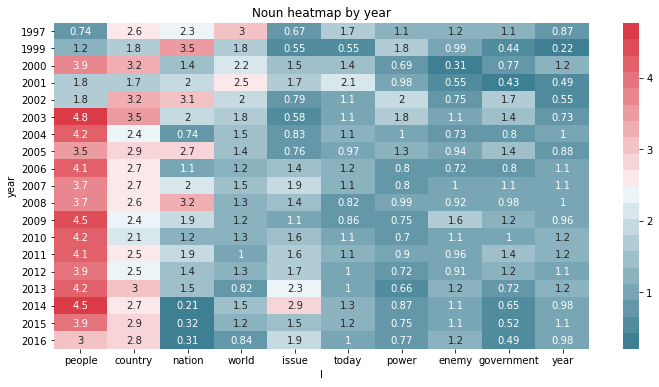

In [100]:
# generate our heatmap, rounding to two decimal places
heat = sns.heatmap(nouns.round(2), annot=True, cmap=colormap)

# add title
heat.set_title('Noun heatmap by year')

Text(0.5, 1.0, 'Noun frequency by year')

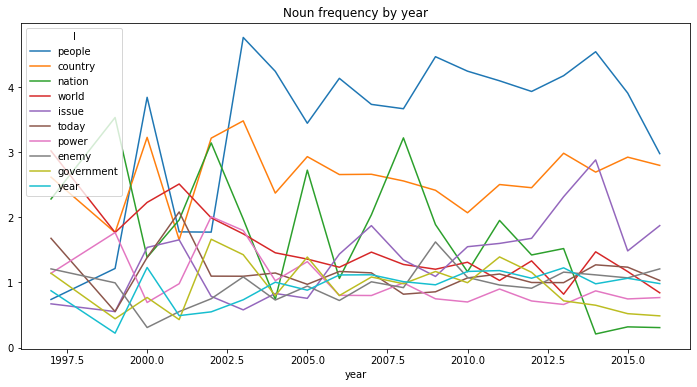

In [104]:
plot = nouns.plot()
plot.set_title("Noun frequency by year")

# Concordancy tables

Concordances can help us understand how a word is being deployed in context. It can help us move between quantitative and qualitative perspectives, ensuring that we are counting what we assume we are.

In [82]:
l.just.w("Israel").conc(show=["w"])[["left", "match", "right","year"]]

,left,match,right,year
0,oals due to America 's alliance with,Israel,and lack of persistence on the part,1997
1,ured . This is not just a defeat for,Israel,alone . It is a defeat for America a,2004
2,"airspace of Lebanon , treating it as",Israel,"'s airspace . On the other hand , Le",2004
3,e reached a point that they can harm,Israel,in ways that no Arab government has,2004
4,re deeply suspicious of American and,Israeli,intelligence services with regard to,2005
...,...,...,...,...
242,Syria deployed their armies against,Israel,"and were defeated . However , Hezbol",2016
243,not under the influence of U.S. and,Israeli,intelligence services - although if,2004
244,vernment is potentially a threat for,Israel,. This is a contradiction . Another,2004
245,s congratulation ? They say that the,Israeli,government is defending itself . Wel,2004


In [88]:
# concordance table for the words America and States apperaing as the subject of the sentence
l.just.w("(America|States)$").just.f("nsubj").conc(show=["w", "f", "p"])[["left","match", "right", "year"]] 

,left,match,right,year
0,", we will have the power to do so .",America/nsubj/NNP,can do nothing when it is faced with,1997
1,Europe . We believe that the United,States/nsubj/NNP,and the West are not the same . U.S.,2000
2,"esently , you can see how the United",States/nsubj/NNP,"of America , which is the pivot of t",2005
3,inating the Middle East . The United,States/nsubj/NNP,is dreaming of a region totally unde,2005
4,"n see that in Iraq , what the United",States/nsubj/NNP,had wished for did not materialize .,2005
...,...,...,...,...
583,"months from the occupation of Iraq ,",America/nsubj/NNP,does not allow the people of Iraq to,2004
584,be more difficult on a daily basis .,America/nsubj/NNP,has faced defeat in Iraq whether it,2004
585,itical legitimacy is doing to them .,America/nsubj/NNP,congratulates a Zionist criminal - S,2004
586,they are defending their existence .,America/nsubj/NNP,"says , "" Israel is defending its exi",2004


In [106]:
l.just.l("regime").conc()[["left", "match","year"]] 

,left,match,year
0,staunch ally for the usurper Zionist,regime,1997
1,han this . The fact that the usurper,regime,1997
2,resence of an enemy like the Zionist,regime,1997
3,lly and fully supporting the Zionist,regime,2000
4,t the last years of the evil Pahlavi,regime,2004
...,...,...,...
1146,their crimes . The usurping Zionist,regime,2004
1147,"ears ago , when the usurping Zionist",regime,2004
1148,it . For a political government and,regime,2004
1149,es its political legitimacy . When a,regime,2004


# Word Counts

In [77]:
# counting the occurrences of JCPOA in the corpus, it's clear that the term came into existence in 2015
l.just.w("JCPOA").year.value_counts()

2016    16
2015     6
Name: year, dtype: int64

In [85]:
# Ahmadinejad was the president from 2005 to 2013
l.just.w("Ahmadinejad").year.value_counts()

2006    6
2005    4
2013    2
2008    2
2007    2
2010    1
2009    1
Name: year, dtype: int64